In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linregress
from scipy.stats import linregress


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


591

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | adrar
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | chambas
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | hami
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | broken hill
Processing Record 15 of Set 1 | vestmannaeyjar
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | faya
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | mataura
Processing Record 23 o

Processing Record 36 of Set 4 | lagoa
Processing Record 37 of Set 4 | okha
Processing Record 38 of Set 4 | kerouane
Processing Record 39 of Set 4 | strezhevoy
Processing Record 40 of Set 4 | prince george
Processing Record 41 of Set 4 | casper
Processing Record 42 of Set 4 | rawson
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | omboue
Processing Record 45 of Set 4 | kaduy
Processing Record 46 of Set 4 | moindou
Processing Record 47 of Set 4 | saskylakh
Processing Record 48 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 49 of Set 4 | saint-philippe
Processing Record 50 of Set 4 | kasama
Processing Record 1 of Set 5 | manta
Processing Record 2 of Set 5 | matay
Processing Record 3 of Set 5 | mar del plata
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | visby
Processing Record 7 of Set 5 | khatanga
Processing Record 8 of Set 5 | pitimbu
Processing Record 9 of Set 5 | port moresby


Processing Record 24 of Set 8 | arman
Processing Record 25 of Set 8 | tornio
Processing Record 26 of Set 8 | xudat
Processing Record 27 of Set 8 | ksenyevka
City not found. Skipping...
Processing Record 28 of Set 8 | zaragoza
Processing Record 29 of Set 8 | rabo de peixe
Processing Record 30 of Set 8 | springbok
Processing Record 31 of Set 8 | tambo
Processing Record 32 of Set 8 | raton
Processing Record 33 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 34 of Set 8 | cidreira
Processing Record 35 of Set 8 | caravelas
Processing Record 36 of Set 8 | saint-pierre
Processing Record 37 of Set 8 | polovinnoye
Processing Record 38 of Set 8 | adre
Processing Record 39 of Set 8 | baturaja
Processing Record 40 of Set 8 | dioknisi
Processing Record 41 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 8 | port lincoln
Processing Record 43 of Set 8 | bonavista
Processing Record 44 of Set 8 | mayo
Processing Record 45 of Set 8 | colac
Processing Recor

Processing Record 16 of Set 12 | segovia
Processing Record 17 of Set 12 | jiwani
Processing Record 18 of Set 12 | miles city
Processing Record 19 of Set 12 | vao
Processing Record 20 of Set 12 | saint anthony
Processing Record 21 of Set 12 | juneau
Processing Record 22 of Set 12 | valparaiso
Processing Record 23 of Set 12 | nizhniy kuranakh
Processing Record 24 of Set 12 | jomalig
City not found. Skipping...
Processing Record 25 of Set 12 | zyryanskoye
Processing Record 26 of Set 12 | dudinka
Processing Record 27 of Set 12 | xiamen
Processing Record 28 of Set 12 | bayan
Processing Record 29 of Set 12 | beipiao
Processing Record 30 of Set 12 | bargal
City not found. Skipping...
Processing Record 31 of Set 12 | dhangadhi
Processing Record 32 of Set 12 | falealupo
City not found. Skipping...
Processing Record 33 of Set 12 | quatre cocos
Processing Record 34 of Set 12 | wagar
Processing Record 35 of Set 12 | helena
Processing Record 36 of Set 12 | salinas
Processing Record 37 of Set 12 | s

In [7]:
len(city_data)

541

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.2266,-6.5890,45.52,93,100,23.11,FO,2022-03-20 18:42:35
1,Adrar,20.5022,-10.0711,80.55,11,0,7.65,MR,2022-03-20 18:42:35
2,Lavrentiya,65.5833,-171.0000,-7.91,76,26,4.21,RU,2022-03-20 18:42:35
3,Tura,25.5198,90.2201,75.70,36,38,5.17,IN,2022-03-20 18:40:10
4,Katsuura,35.1333,140.3000,48.00,88,100,20.85,JP,2022-03-20 18:42:36
5,Mahebourg,-20.4081,57.7000,79.09,94,40,5.75,MU,2022-03-20 18:42:36
6,Iqaluit,63.7506,-68.5145,-9.31,63,20,0.00,CA,2022-03-20 18:42:36
7,Chambas,22.1928,-78.9136,90.16,36,0,13.00,CU,2022-03-20 18:42:37
8,Albany,42.6001,-73.9662,50.95,73,100,10.00,US,2022-03-20 18:40:19
9,Hami,42.8000,93.4500,42.26,30,100,2.77,CN,2022-03-20 18:42:37


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2022-03-20 18:42:35,62.2266,-6.5890,45.52,93,100,23.11
1,Adrar,MR,2022-03-20 18:42:35,20.5022,-10.0711,80.55,11,0,7.65
2,Lavrentiya,RU,2022-03-20 18:42:35,65.5833,-171.0000,-7.91,76,26,4.21
3,Tura,IN,2022-03-20 18:40:10,25.5198,90.2201,75.70,36,38,5.17
4,Katsuura,JP,2022-03-20 18:42:36,35.1333,140.3000,48.00,88,100,20.85


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

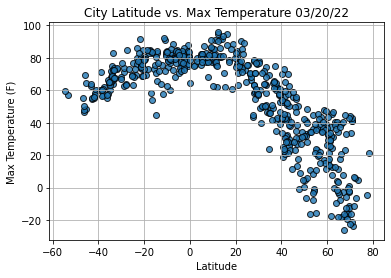

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

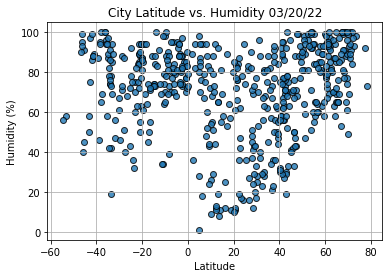

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

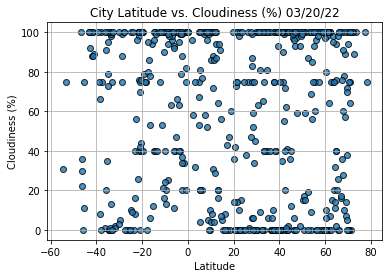

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

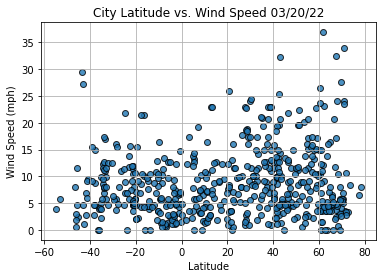

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [44]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(r_value)

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2022-03-20 18:42:35,62.2266,-6.5890,45.52,93,100,23.11
1,Adrar,MR,2022-03-20 18:42:35,20.5022,-10.0711,80.55,11,0,7.65
2,Lavrentiya,RU,2022-03-20 18:42:35,65.5833,-171.0000,-7.91,76,26,4.21
3,Tura,IN,2022-03-20 18:40:10,25.5198,90.2201,75.70,36,38,5.17
4,Katsuura,JP,2022-03-20 18:42:36,35.1333,140.3000,48.00,88,100,20.85


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

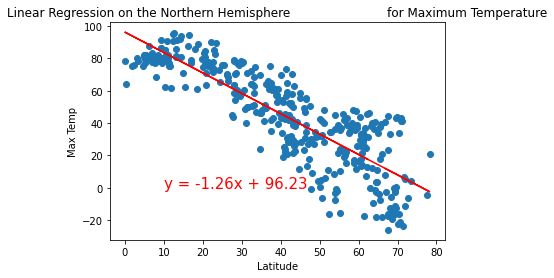

-0.8467874187807208


In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

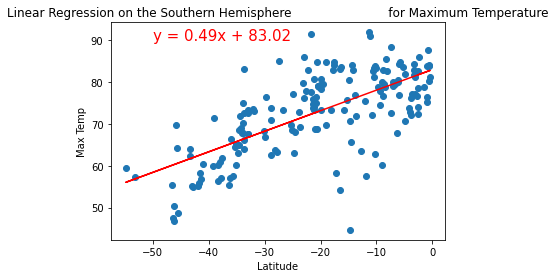

0.6814722774730364


In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

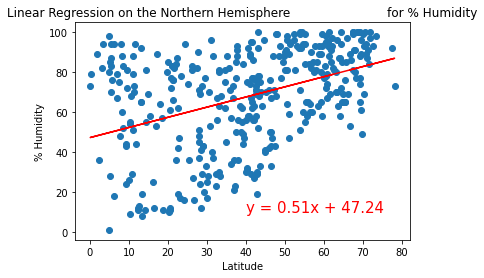

0.4139348717576935


In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

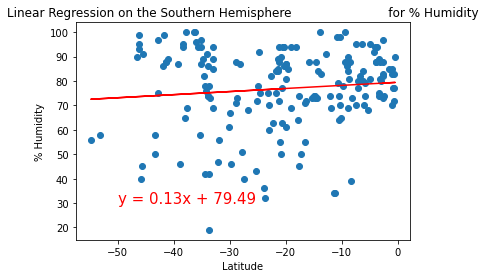

0.10446759807908176


In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

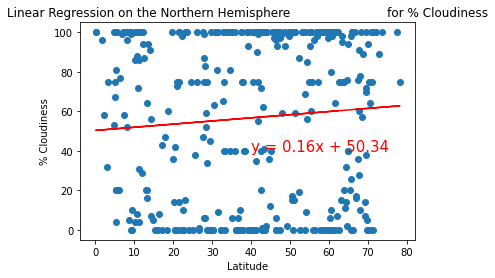

0.07636424575661159


In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,40))

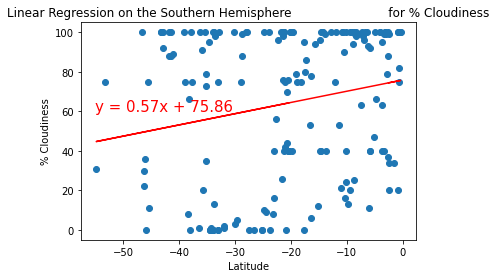

0.2048184437554098


In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,60))

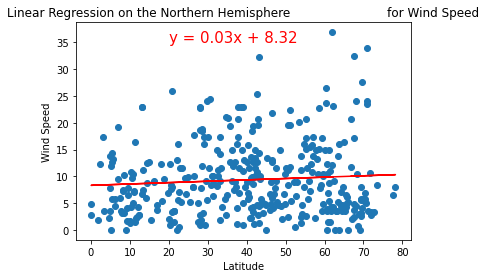

0.07564629553458609


In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,35))

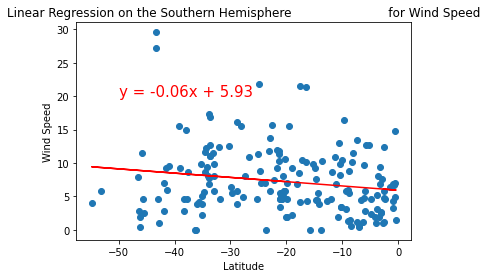

-0.1747600397180894


In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))